# Day 13

In [1]:
from aocd import get_data
from inspect import cleandoc
from IPython.display import display, Markdown

def answer(x):
    display(Markdown(f"**Answer** = {x}"))

data = get_data(year=2023, day=13)

## Part 1

In [2]:
example = cleandoc("""
    #.##..##.
    ..#.##.#.
    ##......#
    ##......#
    ..#.##.#.
    ..##..##.
    #.#.##.#.
    
    #...##..#
    #....#..#
    ..##..###
    #####.##.
    #####.##.
    ..##..###
    #....#..#
""")

In [3]:
from more_itertools import first, transpose
from matplotlib.pyplot import figure

def parse(text):
    return [
        [list(line) for line in pattern.split("\n")]
        for pattern in text.split("\n\n")
    ]

def is_reflection_line(pattern, n):
    return all(
        a == b
        for a, b in zip(list(reversed(pattern[0:n])), pattern[n:])
    )

def reflection_horiz_line(pattern):
    return first(
        (
            n
            for n in range(1, len(pattern))
            if is_reflection_line(pattern, n)
        ), None
    )

def reflection_vert_line(pattern):
    return reflection_horiz_line(list(transpose(pattern)))

def reflection_line(pattern):
    return reflection_vert_line(pattern) or (100 * reflection_horiz_line(pattern))

def reflection_line_sum(patterns):
    return sum(reflection_line(pattern) for pattern in patterns)

def pattern_image(pattern):
    PIXELS = {".": (0, 0, 0), "#": (255, 255, 255)}
    return [
        [PIXELS[c] for c in line]
        for line in pattern
    ]

def show_fold(pattern, n):
    fig = figure()
    ax = fig.add_subplot(1, 2, 1)
    ax.set_anchor("N")
    ax.imshow(pattern_image(list(reversed(pattern[0:n]))))
    ax = fig.add_subplot(1, 2, 2)
    ax.set_anchor("N")
    ax.imshow(pattern_image(pattern[n:]))

example_patterns = parse(example)
is_reflection_line(example_patterns[1], 0)
reflection_line_sum(example_patterns)

405

In [4]:
data_patterns = parse(data)

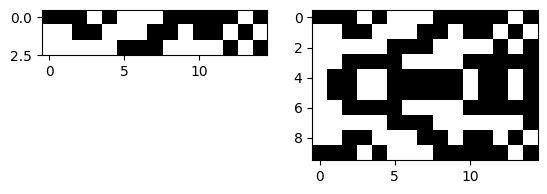

In [5]:
show_fold(data_patterns[2], 3)

In [6]:
answer(reflection_line_sum(data_patterns))

**Answer** = 37113

## Part 2

In [7]:
def is_reflection_line2(pattern, n):
    return sum(
        c1 != c2
        for line1, line2 in zip(list(reversed(pattern[0:n])), pattern[n:])
        for c1, c2 in zip(line1, line2)
    ) == 1

def reflection_horiz_line2(pattern):
    return first(
        (
            n
            for n in range(1, len(pattern))
            if is_reflection_line2(pattern, n)
        ), None
    )

def reflection_vert_line2(pattern):
    return reflection_horiz_line2(list(transpose(pattern)))

def reflection_line2(pattern):
    return reflection_vert_line2(pattern) or (100 * reflection_horiz_line2(pattern))

def reflection_line_sum2(patterns):
    return sum(reflection_line2(pattern) for pattern in patterns)

reflection_line_sum2(example_patterns)

400

In [8]:
answer(reflection_line_sum2(data_patterns))

**Answer** = 30449